In [ ]:
import math
import numpy as np
import random
import scipy.optimize as opt
from numpy.random import randn
from math import exp
import matplotlib.pyplot as plt

problem_call_counter = 0
g1_counter = 0
g2_counter = 0
g3_counter = 0
g4_counter = 0
g5_counter = 0
g6_counter = 0
g7_counter = 0


def P(X):
    result = (math.log10(math.log10(8.122 * X[3] + 0.8)) - 10.04) / -3.55
    return result

def delta_T(X):
    result_P = P(X)
    result = 2 * (10 ** result_P - 560)
    return result


def g3(X):
    global g3_counter
    g3_counter += 1
    result_delta_T = delta_T(X)
    result = result_delta_T - 50
    return result


def Ef(X):
    result_delta_T = delta_T(X)
    result = 143.308 * result_delta_T * X[0]
    return result

def hf(X):
    result_ef = Ef(X)
    result = ((1500 * math.pi) / 60) ** 2 * (2 * (10 ** -6) * math.pi * X[3]) / result_ef * (((X[2] ** 4) / 4) - ((X[1] ** 4) / 4))
    return result

def PO(X):
    result_h = hf(X)
    result = (6 * 10**-6 * X[3] * X[0]) / (math.pi * (result_h)**3) * math.log(X[2] / X[1])
    return result

def W(X):
    result_Po = PO(X)
    result = (math.pi * PO(X) / 2) * ((X[2]**2 - X[1]**2) / math.log(X[2] / X[1]))
    return result

def g4(X):
    global g4_counter
    g4_counter += 1
    result_hf = hf(X)
    result = 0.001 - result_hf
    return result


def g2(X):
    global g2_counter
    g2_counter += 1
    result_Po = PO(X)
    result = result_Po - 1000
    return result


def g1(X):
    global g1_counter
    g1_counter += 1

    result_w = W(X)
    result = 101000 -result_w
    return result


def g5(X):
    global g5_counter
    g5_counter += 1
    result = X[1] - X[2]
    return result


def g6(X):
    global g6_counter
    g6_counter += 1
    result_Po = PO(X)
    result_hf = hf(X)

    result = ((0.0307 * X[0]) / (772.8 * math.pi * result_Po * result_hf * X[2])) -0.001
    return result


def g7(X):
    global g7_counter
    g7_counter += 1
    result_W = W(X)

    result = (result_W / (math.pi * (X[2] **2 - X[1] **2))) - 5000
    return result

def problem(X):
    global problem_call_counter
    problem_call_counter += 1
    result_Po = PO(X)
    result_ef = Ef(X)
    result = ((result_Po * X[0])/0.7) + result_ef
    return result

x = np.array([4.19, 11.57, 6.69, 10.65])
print(f"Constraint function output, f(x) =  {problem(x)}")
print(f"Constraint function output, g1(x) =  {g1(x)}")
print(f"Constraint function output, g2(x) =  {g2(x)}")
print(f"Constraint function output, g3(x) =  {g3(x)}")
print(f"Constraint function output, g4(x) =  {g4(x)}")
print(f"Constraint function output, g5(x) =  {g5(x)}")
print(f"Constraint function output, g6(x) =  {g6(x)}")
print(f"Constraint function output, g7(x) =  {g7(x)}")

Constraint function output, f(x) =  -1784.0773507231927
Constraint function output, g1(x) =  101000.01528759542
Constraint function output, g2(x) =  -1000.0000598304209
Constraint function output, g3(x) =  -52.97118117373543
Constraint function output, g4(x) =  -0.9196377239881502
Constraint function output, g5(x) =  4.88
Constraint function output, g6(x) =  -0.14477999681964232
Constraint function output, g7(x) =  -4999.999945390436


In [ ]:
def random_search(problem, min_x, max_x, num_iterations, penalty_factor):
    min_val = float('inf')
    min_x_at_min_val = None
    g1_counter = 0
    g2_counter = 0
    g3_counter = 0
    g4_counter = 0
    g5_counter = 0
    g6_counter = 0
    g7_counter = 0
    for _ in range(num_iterations):
        X = np.random.uniform(min_x, max_x)

        # Evaluate the constraints
        g_values = [g1(X), g2(X), g3(X), g4(X), g5(X), g6(X), g7(X)]

        # Check feasibility based on constraints
        if g1(X) <= 0 and g2(X) <= 0 and g3(X) <= 0 and g4(X) <= 0 and g5(X) <= 0 and g6(X) <= 0 and g7(X) <= 0 :
            fx = problem(X)

        else:
            # Calculate penalty for infeasibility
            penalty = sum(max(0, g) for g in g_values)
            # Apply penalty to the objective function
            fx = problem(X) + penalty_factor * penalty

        # Check if the current value is the new minimum
        if fx < min_val:
            min_val = fx
            min_x_at_min_val = X

    return min_val, min_x_at_min_val, g2_counter
#chechpoint

In [1]:
def simulated_annealing1(objective, bounds, iterations, step_size, t_initial,min_x, max_x,starting_point):
    xBest = starting_point
    # evaluate the initial point
    yBest = problem(xBest)

    xC, yC = xBest, yBest
    g1_counter = 0
    g2_counter = 0
    g3_counter = 0
    g4_counter = 0
    g5_counter = 0
    g6_counter = 0
    g7_counter = 0
    for i in range(1, iterations + 1):
        # Generate a transition using a normal distribution
        xDash = xC + randn(len(bounds)) * step_size

        yDash = objective(xDash)  # Ensure within bounds

        #g_values = [g1(x_dash), g2(x_dash), g3(x_dash), g4(x_dash), g5(x_dash), g6(x_dash), g7(x_dash)]
        #feasible = all(g >= 0 for g in g_values)
        g_values = [g(xDash) for g in [g1, g2, g3, g4, g5, g6, g7]]  # Evaluate constraints for current point

        if any(g > 0 for g in g_values):
            penalty = penalty_factor * sum(max(0, g) for g in g_values)
            yDash += penalty  # Apply penalty to the objective function

        diff = yDash - yC
        t = t_initial / i

        dt = np.random.uniform(0,1)

        if diff < 0 or dt < min(exp(-diff / t),1):


           xC, yC = xDash , yDash
        if yDash < yBest:
          xBest, yBest = xDash , yDash
    return xBest, yBest


Params


In [ ]:
t_initial = 12
min_X = np.array([1, 1, 1, 1])
max_X = np.array([16, 16, 16, 16])
iterations = 10000
penalty_factor = 10
step_size = (max_X - min_X) * 0.001
bounds = np.array([[1, 16], [1, 16], [1, 16], [1, 16]])

In [ ]:
minimum_value, min_x_at_minimum = random_search(problem, min_X, max_X, iterations,penalty_factor)
starting_point =min_x_at_minimum


print(f"Minimum value found: {minimum_value} at X = {min_x_at_minimum}")

2590132
Minimum value found: 19213.280733488027 at X = [2.5603215  6.2459966  5.86093689 5.84185974]


21


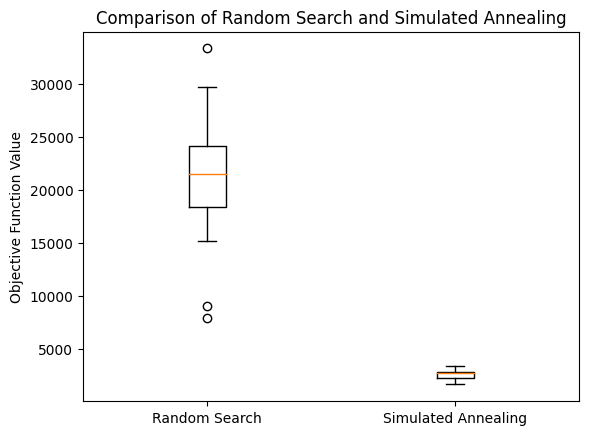

In [ ]:
random_search_results = []
simulated_annealing_results = []

num_repetitions = 21
for _ in range(num_repetitions):
    # Run Random Search
    minimum_value_rs,_ = random_search(problem, min_X, max_X, iterations, penalty_factor)
    random_search_results.append(minimum_value_rs)

    # Run Simulated Annealing
    _, best_eval_sa = simulated_annealing1(problem, bounds, iterations, step_size, t_initial, min_X, max_X, starting_point)
    simulated_annealing_results.append(best_eval_sa)
print(len(random_search_results))
# Create  box plot to visualize the results
plt.boxplot([random_search_results, simulated_annealing_results], labels=['Random Search', 'Simulated Annealing'])
plt.ylabel('Objective Function Value')
plt.title('Comparison of Random Search and Simulated Annealing')
plt.show()


i belive that simulated annealing performs better as you can see that the lowest value is lower than the lowest value of random search as well as the high/low quartile. The difference of the highest and lowest value in simulated annealing is small due to the step size being small and an emphisis on explore and exploit whereas random search difference is very large due to every sample is random and it does not exploit.

1.5